
## Problem Statment :
### Hard Rock Cafe wants to make sure customers are happy, and online reviews hold the key. We're diving into customer feedback to understand how people feel and what they talk about the most. By using sentiment analysis and topic modeling, we aim to figure out what customers love and where we can do better. The challenge is connecting the dots between feelings (sentiments) and star ratings, helping us focus on what matters most for a great dining experience. This analysis is all about making Hard Rock Cafe smarter in decision-making and quick to adapt to what customers really want.

### Importing all the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

### Load dataset

In [ ]:
cafe= pd.read_csv("C:\\Users\\aniru\\OneDrive\\Desktop\\HardRock cafe dataset.csv")

### Exploratory Data Analysis (EDA):
###### Understand the structure and characteristics of the dataset

In [ ]:
cafe.head()

,Date,Rating,Title,Review
0,01-Jan-23,5,Lovely meal,Always a good meal at hard rock. Our waitress ...
1,28-Dec-22,4,"Nice place, Tasty Burgers",Like the restaurant. The burgers are delicious...
2,22-Nov-22,5,Hard Rock Times Square.,Right on Times Square. Great staff. Huge meals...
3,07-Nov-22,3,Off hand bar service,Usual Hard Rock Cafe set up. Shop and bar rest...
4,16-Oct-22,4,A Must Stop for Us,My wife and I always stop into a Hard Rock to ...


In [ ]:
cafe['Title'].values[200]

"Food wasn't good!!"

In [ ]:
print(cafe.shape)

(251, 4)


### Rating based on the stars

<AxesSubplot:title={'center':'Count of Reviews by Stars'}>

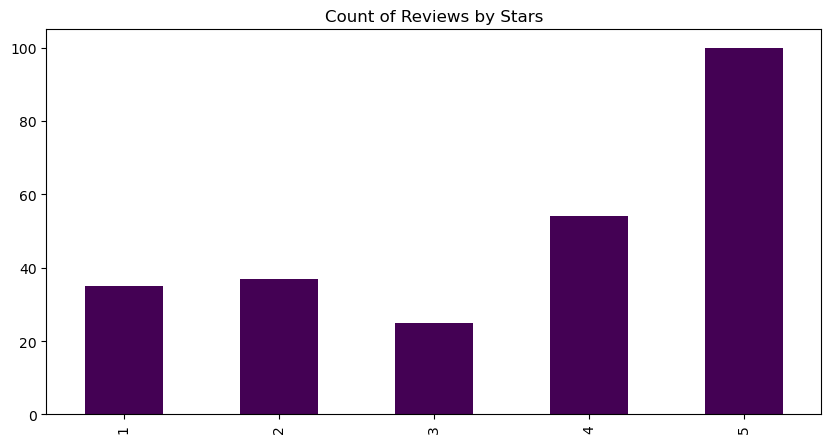

In [ ]:
cafe['Rating'].value_counts().sort_index().plot(kind='bar', colormap='viridis', title='Count of Reviews by Stars', figsize=(10, 5))


## NLTK

In [ ]:
example= cafe['Review'][50]
print(example)

Group reservation - pre-ordered entrees - 1 he 15 to get food. No manager - waitstaff rude laughed at us when we asked for help. Good disgusting and overpriced. Do NOT spend your money there!!!


### Tokenizing the Example

In [ ]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(example)

print(tokens)

['Group', 'reservation', '-', 'pre-ordered', 'entrees', '-', '1', 'he', '15', 'to', 'get', 'food', '.', 'No', 'manager', '-', 'waitstaff', 'rude', 'laughed', 'at', 'us', 'when', 'we', 'asked', 'for', 'help', '.', 'Good', 'disgusting', 'and', 'overpriced', '.', 'Do', 'NOT', 'spend', 'your', 'money', 'there', '!', '!', '!']


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aniru\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Finding the part of speech for each of this words

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.pos_tag(tokens)

[('Group', 'NNP'),
 ('reservation', 'NN'),
 ('-', ':'),
 ('pre-ordered', 'JJ'),
 ('entrees', 'NNS'),
 ('-', ':'),
 ('1', 'CD'),
 ('he', 'PRP'),
 ('15', 'CD'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('food', 'NN'),
 ('.', '.'),
 ('No', 'NNP'),
 ('manager', 'NN'),
 ('-', ':'),
 ('waitstaff', 'NN'),
 ('rude', 'NN'),
 ('laughed', 'VBN'),
 ('at', 'IN'),
 ('us', 'PRP'),
 ('when', 'WRB'),
 ('we', 'PRP'),
 ('asked', 'VBD'),
 ('for', 'IN'),
 ('help', 'NN'),
 ('.', '.'),
 ('Good', 'JJ'),
 ('disgusting', 'NN'),
 ('and', 'CC'),
 ('overpriced', 'VBN'),
 ('.', '.'),
 ('Do', 'VB'),
 ('NOT', 'NNP'),
 ('spend', 'VB'),
 ('your', 'PRP$'),
 ('money', 'NN'),
 ('there', 'RB'),
 ('!', '.'),
 ('!', '.'),
 ('!', '.')]

## Vader Sentimant Scoring
#### This uses a mag of words approach
#### 1) Stop words are removed
#### 2) Each word is scored and combined to a total score

### Going to use nltk SentimentIntensityAnalyzerto get negative/neutral/possitive Scores of the Text

### Importing libraries for the sentiment Analysis

In [ ]:
import nltk


from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia= SentimentIntensityAnalyzer()

In [ ]:
sia

#### Checking polarity scores of two diffrent sentences ('Today is a beautiful day' & Today is the worst day ever)

In [ ]:
sia.polarity_scores('Today is a beautiful day')

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}

In [ ]:
sia.polarity_scores('Today is the worst day ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

###### based on two of this examples we can see the positive ,neutral and negative scores and the compound score which is the aggragation of the postitive , negative and nuetral . (-1 to 1)

In [ ]:
sia.polarity_scores(example)

{'neg': 0.204, 'neu': 0.592, 'pos': 0.204, 'compound': -0.2206}

## Run the polarity scores for the entire dataset


In [ ]:
cafe

,Date,Rating,Title,Review
0,01-Jan-23,5,Lovely meal,Always a good meal at hard rock. Our waitress ...
1,28-Dec-22,4,"Nice place, Tasty Burgers",Like the restaurant. The burgers are delicious...
2,22-Nov-22,5,Hard Rock Times Square.,Right on Times Square. Great staff. Huge meals...
3,07-Nov-22,3,Off hand bar service,Usual Hard Rock Cafe set up. Shop and bar rest...
4,16-Oct-22,4,A Must Stop for Us,My wife and I always stop into a Hard Rock to ...
...,...,...,...,...
246,07-Nov-22,1,Off hand bar service,Usual Hard Rock Cafe set up. Shop and bar rest...
247,07-Nov-22,2,Off hand bar service,Usual Hard Rock Cafe set up. Shop and bar rest...
248,21-Jul-22,1,Food wasn't good!!,Usually love a Hard Rock but the food was disa...
249,24-Jun-22,2,Meh,"Very mediocre food, we got stuck with here as ..."


In [ ]:
#Before checking the polarity score we need to add ID column to the Existing DataFrame
cafe.reset_index(inplace=True)
cafe.rename(columns={'index': 'ID'}, inplace=True)


In [ ]:
cafe

,ID,Date,Rating,Title,Review
0,0,01-Jan-23,5,Lovely meal,Always a good meal at hard rock. Our waitress ...
1,1,28-Dec-22,4,"Nice place, Tasty Burgers",Like the restaurant. The burgers are delicious...
2,2,22-Nov-22,5,Hard Rock Times Square.,Right on Times Square. Great staff. Huge meals...
3,3,07-Nov-22,3,Off hand bar service,Usual Hard Rock Cafe set up. Shop and bar rest...
4,4,16-Oct-22,4,A Must Stop for Us,My wife and I always stop into a Hard Rock to ...
...,...,...,...,...,...
246,246,07-Nov-22,1,Off hand bar service,Usual Hard Rock Cafe set up. Shop and bar rest...
247,247,07-Nov-22,2,Off hand bar service,Usual Hard Rock Cafe set up. Shop and bar rest...
248,248,21-Jul-22,1,Food wasn't good!!,Usually love a Hard Rock but the food was disa...
249,249,24-Jun-22,2,Meh,"Very mediocre food, we got stuck with here as ..."


In [ ]:
# Run the polarity score on the entire dataset
res = {}
for index, row in tqdm(cafe.iterrows(), total=len(cafe)):
    text = row['Review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)


  0%|          | 0/251 [00:00<?, ?it/s]

In [ ]:
#polarity scores of each customer reviews
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.043,0.520,0.437,0.9168
1,0.039,0.664,0.297,0.8883
2,0.072,0.489,0.440,0.9062
3,0.210,0.790,0.000,-0.7584
4,0.112,0.654,0.234,0.8104
...,...,...,...,...
246,0.210,0.790,0.000,-0.7584
247,0.210,0.790,0.000,-0.7584
248,0.125,0.816,0.059,-0.4404
249,0.061,0.939,0.000,-0.2500


In [ ]:
# Create a DataFrame 'vaders' from the sentiment analysis results stored in the 'res' dictionary
vaders = pd.DataFrame(res).T

# Reset the index of 'vaders' and rename the column 'index' to 'ID'
vaders = vaders.reset_index().rename(columns={'index': 'ID'})

# Merge the 'vaders' DataFrame with the 'cafe' DataFrame using a left join
vaders = vaders.merge(cafe, how='left')

In [ ]:
#now we have sentiment score and data
vaders.head()

,ID,neg,neu,pos,compound,Date,Rating,Title,Review
0,0,0.043,0.520,0.437,0.9168,01-Jan-23,5,Lovely meal,Always a good meal at hard rock. Our waitress ...
1,1,0.039,0.664,0.297,0.8883,28-Dec-22,4,"Nice place, Tasty Burgers",Like the restaurant. The burgers are delicious...
2,2,0.072,0.489,0.440,0.9062,22-Nov-22,5,Hard Rock Times Square.,Right on Times Square. Great staff. Huge meals...
3,3,0.210,0.790,0.000,-0.7584,07-Nov-22,3,Off hand bar service,Usual Hard Rock Cafe set up. Shop and bar rest...
4,4,0.112,0.654,0.234,0.8104,16-Oct-22,4,A Must Stop for Us,My wife and I always stop into a Hard Rock to ...


## Plot Vader Result

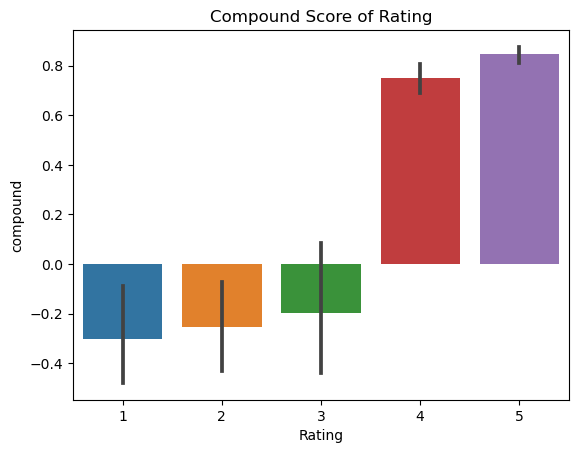

In [ ]:
#'compound' is a column in your DataFrame
sns.barplot(data=vaders, x='Rating', y='compound')
plt.title('Compound Score of Rating')  # Setting the title
plt.show()

###### The plotted graph demonstrates a clear positive correlation between review sentiment and the number of stars given. As the star ratings increase (moving from, for example, 1 to 5 stars), there is a consistent upward trend in polarity scores.

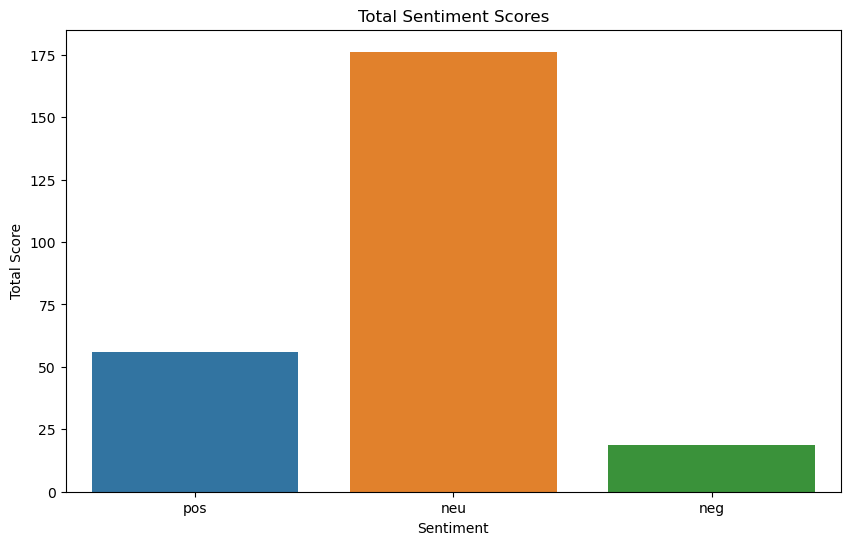

In [ ]:
# columns 'pos', 'neu', and 'neg' in the DataFrame
total_scores = vaders[['pos', 'neu', 'neg']].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=total_scores.index, y=total_scores.values)

plt.title('Total Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Total Score')
plt.show()


##### In the above graph also we can see postive feedbacks are much more than negative feedbacks

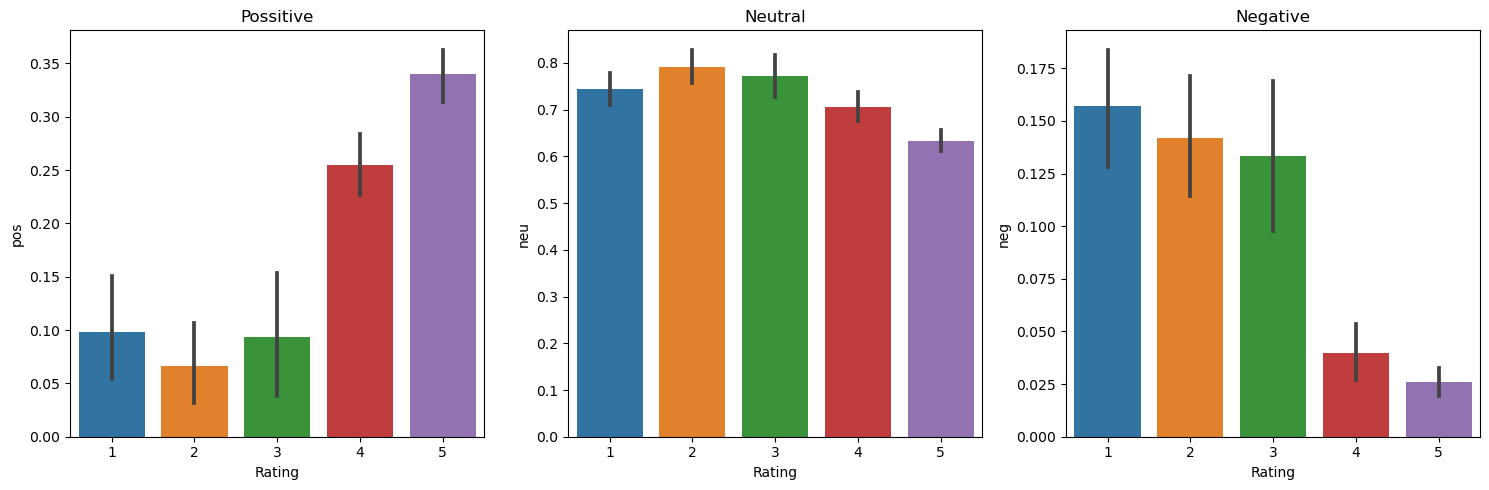

In [ ]:
fig, axs=plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders,x='Rating',y='pos', ax=axs[0])
sns.barplot(data=vaders,x='Rating',y='neu', ax=axs[1])
sns.barplot(data=vaders,x='Rating',y='neg', ax=axs[2])
axs[0].set_title('Possitive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

###### The plotted subplots illustrate the sentiment distribution across different star ratings. In the 'Positive' subplot, there is a noticeable upward trend, indicating that higher star ratings correspond to higher positive sentiment scores. Conversely, in the 'Negative' subplot, there is a declining trend, suggesting that as star ratings increase, the associated negative sentiment scores decrease. These trends imply a positive correlation between star ratings and sentiment polarity—higher ratings are associated with more positive sentiments and fewer negative sentiments. The 'Neutral' subplot provides insights into the distribution of neutral sentiments across ratings, contributing to a comprehensive view of the sentiment landscape associated with different star ratings.

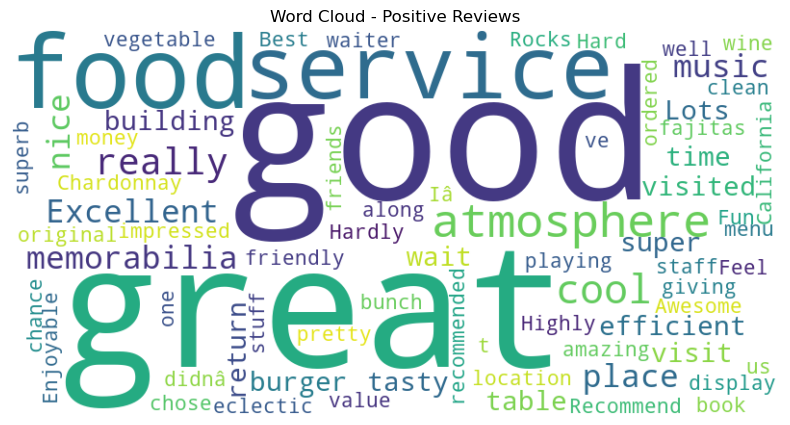

In [ ]:
from wordcloud import WordCloud
positive_text = ' '.join(vaders[vaders['pos'] > 0.5]['Review'])

# Create WordCloud for positive sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plotting the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'vaders'
# Assuming 'neg' column represents the negative scores
negative_reviews = vaders[vaders['neg'] > 0.2]['Review']

# Create WordCloud for negative sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plotting the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()


NameError: name 'negative_text' is not defined

# Topic Modeling  

In [ ]:
##pre processing text data for Topic Modeling

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#'Review' is the column containing text data
reviews = vaders['Review']

# Tokenize and remove stop words
stop_words = set(stopwords.words('english'))
tokenized_reviews = reviews.apply(lambda x: word_tokenize(x.lower()))
filtered_reviews = tokenized_reviews.apply(lambda x: [word for word in x if word.isalnum() and word not in stop_words])


In [ ]:
##Create a Document-Term Matrix (DTM):

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert to Document-Term Matrix
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(filtered_reviews.apply(lambda x: ' '.join(x)))


In [ ]:
## Apply Latent Dirichlet Allocation (LDA)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# I want to identify 5 topics
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)


In [ ]:
##Explore Topics and Associated Words:

In [ ]:
# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    Topwords=(f"Topic {i + 1}: {', '.join(top_words)}")
    print(Topwords)


#### Topic 1: This topic seems to be related to positive experiences with food and the atmosphere. Words like "food," "cool," "nice," and "amazing" suggest positive sentiments.

#### Topic 2: This topic may be related to the general experience at a Hard Rock Cafe, including words like "food," "good," "bar," "rock," and "service."

#### Topic 3: This topic appears to involve discussions about food and other related aspects. Words like "food," "great," "drinks," and "memorabilia" suggest positive sentiments.

#### Topic 4: This topic seems to focus on the quality of service and the overall dining experience. Words like "service," "good," "meal," and "helpful" suggest a positive evaluation of the restaurant's service.

#### Topic 5: This topic could be associated with the general experience at Hard Rock Cafe, including positive sentiments related to food, service, and the staff.

#### Keep in mind that the interpretation of topics heavily depends on the specific context of the documents you used for topic modeling. You may need to refer to the original documents or have domain knowledge to provide a more accurate interpretation.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each topic
for i, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    words_freq = {word: topic[idx] for idx, word in enumerate(feature_names) if word in top_words}

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {i + 1} Word Cloud')
    plt.axis('off')
    plt.show()


# Conclusion

#### The sentiment analysis, conducted using various tools such as NLTK, VADER, and Sentiment Intensity Analyzer, revealed that the reviews predominantly exhibit positive sentiments. This positivity is reflected in the sentiment scores, with higher star ratings corresponding to increased positive sentiments and decreased negative sentiments.

#### The topic modeling results, employing Latent Dirichlet Allocation (LDA) on the tokenized and filtered reviews, unveiled five distinct topics associated with the experiences at the Hard Rock Cafe. These topics encompass aspects like food quality, the overall atmosphere, service, and positive expressions about the staff.
#### Specifically, Topic 1 highlights positive experiences related to food and the overall atmosphere.
#### Topic 2 revolves around the general experience at Hard Rock Cafe, including aspects like food, the bar, and service.
#### Topic 3 emphasizes positive discussions about food and related aspects.
#### Topic 4 focuses on the quality of service and the overall dining experience
#### Topic 5 captures the general positive experience at Hard Rock Cafe, encompassing sentiments related to food, service, and staff.
####  the combined analysis suggests that customers generally express positive sentiments in their reviews, with topics covering various aspects of the dining experience at Hard Rock Cafe. The findings can be valuable for the establishment in understanding what aspects are resonating positively with customers and can help in further enhancing the overall customer satisfaction.